# 1. Estimating  Service Metrics from Device Statistics

The objective of this task is to estimate the frame rate of a VoD service from the device statistics of a VoD server (see Figure 1). Our approach is to gather observations from the system and apply linear regression on this data to estimate the service metric $Y$ from device statistics $X$. For this task, we use the trace with 3600 observations described above. The device statistics are described by the feature set in table (a), and the service metric is shown in table (b). 

Your task is to compute (i.e., to train) a linear model $M$ that accurately maps device statistics onto service metrics. 

You train and test your model $M$ with the so-called validation-set technique. This technique entails that you split the set of observations into two parts: the  $\textit{training set}$ for computing the model $M$ and the  $\textit{test set}$ for evaluating the accuracy of $M$. From the complete set of observations, you select uniformly at random 70% of the observations (i.e., 2520 observations) to form the training set and then assign the remaining 30% (i.e., 1080 observations) to the test set.

#### Table (a):
| Field ID | Description                     |
|----------|---------------------------------|
| runq-sz  | Run queue length                |
|%%memused | Percentage of used memory       |
|  proc/s  | Rate of process creation        |
|all\_%%usr| Percentage of CPU utilization   |
| ldavg/1  | Load average for the last minute|
| totsck   | Number of used sockets          |
| pgfree/s | Rate of freeing pages           |
| plist-sz | Number of tasks in the task list|
| file-nr  | Number of file handles          |


#### Table (b):
| Field ID   | Description                  |
|------------|------------------------------|
| DispFrames | Video Frame Rate             |

## 1.1 Evaluate the Accuracy of Service Metric Estimation

Linear regression is a method that assume there is a linear relation between Y (service metrics) and X (device statistics). If X has n features then we can write the linear relation as following:

\begin{equation*}
Y = w_1*x_1+w_2*x_2+...+b
\end{equation*}
where W is the weights vector and b is the bias. The example 1 shows a simple implementation of linear regression. Example 1 shows how we use linear regression to fit a linear model to our dataset. 

In this part you need to change examples in a way that:

1) Use linear regression to train a model M with the training set. Provide coefficients $(w_1, w_2, ...)$ and bias b of your model M.

2) To assess the accuracy of the estimate error of M over test set. We define the estimate error as the Normalized Mean Absolute Error (NMAE) which is defined as $\frac{1}{\bar{y}}(\frac{1}{m}\sum\limits_{i=1}^{m}|y_i-\hat{y}_i|)$, where $\hat{y}_i$ is the model estimation for the measured service metrics $y_i$, and $\bar{y}$ is the average of the observations $y_i$ of the test set, which is size of m=1080 [1]. Note that $\hat{y}_i=M(y_i)$. As a baseline for M, use a $naive$ method which relies on Y values only. For each x in X it predicts a constant value $\bar{y}$ which is the sample mean of samples $y_i$ in training set. Compute $\bar{y}$ for the naive method for the training set and compute the NMAE for the test set.

3) Produce a time series plot that shows both the measurements and the model estimation for M for the Video Frame Rate values in the test set (see example of such a plot in Figure 4(a) of [1]). Show also the prediction of the naive method.

4) Produce a density plot and a histogram for the Video Frame Rate values in the test set. Set the bin size of the histogram to 1 frame. 

5) Produce a density plot for the prediction error $y_i-\hat{y}_i$ in the test set.

6) Based on the above figure and graphs, discuss the accuracy of estimating the Video Frame Rate.
### Example 1

Coefficients: 
 [ 938.24]
Mean squared error: 2548.07
Variance score: 0.47


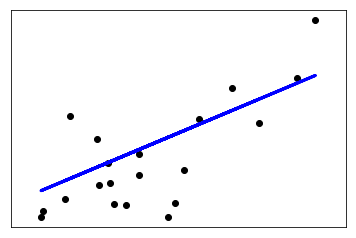

In [60]:
#http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Example 2

In this example we train the linear model and then use it to predict service metrics for test set. We use the results to assess the accuracy of this linear model.

In [61]:
# Read external data into the program

import pandas as pd

# Read X,Y traces into pandas DataFrames named X,Y
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')

In [62]:
# Producing training set and test set


# Here is how you can create a single frame with selected columns

X_features = ['plist-sz', 'file-nr']
XY = pd.concat([X[X_features], Y['DispFrames']], axis=1)


# Split XY into training set and test set of equal size

from sklearn.model_selection import train_test_split
train, test = train_test_split(XY, test_size = 0.5)

# Sort the train and test sets after index (which became unsorted through sampling)
train = train.sort_index(axis=0)
test = test.sort_index(axis=0)

# Extract X,Y components from test and train sets
X_train = train[X_features]; X_test = test[X_features]
Y_train = train['DispFrames']; Y_test = test['DispFrames']

In [63]:
# Computing and evaluating a linear model

import numpy as np

from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(X_train, Y_train)

# Print the model coefficients
np.set_printoptions(precision=2)
print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)

# Compute the mean squared error of the model over the test set
MSE = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Mean Squared Error (MSE): %.2f" %MSE)

Coefficients: [-0.01 -0.01]
Intercept: 44.0374640001
Mean Squared Error (MSE): 8.97


## 1.2 Relation between Estimation Accuracy and size of training set

In this section we attemp to find the relation of the size of training set and accuracy of the model.

a) From the training set with 2520 observation, create six training sets by selecting uniformly at random 50,100,200, 500,1000 and 2520 observations (which is the original set).

b) Train a linear model and compute the NMAE for each model for the original test set with 1080 observations.

c) Perform the above 50 times, so you train models for 50 different subsets of a given size.

d) Produce a plot that shows NMAE for M against the size of the training set. Use error bars or box plots to show the range of the NMAE values for a given set size.

e) Based on the above, discuss the relationship between the accuracy of the model estimation and the training set.

### Guide 

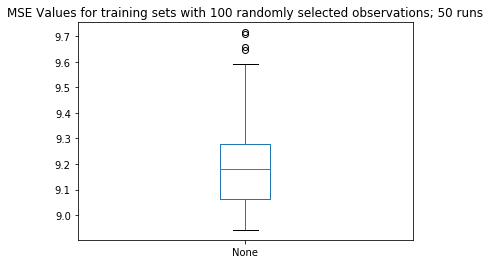

In [32]:
# Producing models for randomly selected training sets

# Produce a training set using 100 random sample from X train
# Evaluate the model on the test set X_test, Y_test by computing MSE
# Perform the above 50 times

# define the result vector for the evaluation
MSE = pd.Series(index=range(0,50))

for i in range(0, 50):
    # Split X,Y into training set and test set
    train, test = train_test_split(XY, test_size = 3500./3600.)

    # Split train and test sets into X,Y components
    X_train = train[['plist-sz', 'file-nr']]; X_test = test[['plist-sz', 'file-nr']]
    Y_train = train['DispFrames']; Y_test = test['DispFrames']

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Compute MSE 
    MSE[i] = np.mean((regr.predict(X_test) - Y_test) ** 2)
    
    
# Show the distribution of the MSE values
import matplotlib.pyplot as plt
MSE.plot.box(title="MSE Values for training sets with 100 randomly selected observations; 50 runs"); plt.show()